In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("retrievers_benchmark.csv")

In [5]:
df.head()

,question,answer,source,collection_name,embedding_model,k,recall,recall@1,recall@2,recall@3,precision,precision@1,precision@2,precision@3,average_precision,retrieval_count
0,ما هو صافي ربح المجموعة لعام 2022؟,424.6 مليون ريال سعودي,Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,1,1,1,1,0.25,1,1,1,1.0,4
1,ما هو صافي ربح المجموعة لعام 2021؟,587.7 مليون ريال سعودي,Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,1,0,1,1,0.25,0,0,0,0.5,4
2,ما هي نسبة تغير صافي ربح المجموعة بين 2022 و 2...,انخفض بنسبة 27.8%,Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,0,0,0,0,0.00,0,0,0,0.0,4
3,ماذا كانت الايرادات التشغيلية للمجموعة لعام 2022؟,"1,071.4 مليون ريال سعودي",Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,1,0,1,1,0.25,0,0,0,0.5,4
4,ماذا كانت الايرادات التشغيلية للمجموعة لعام 2021؟,"1,166.1 مليون ريال سعودي",Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,0,0,0,0,0.00,0,0,0,0.0,4


In [7]:
df.describe()

,k,recall,recall@1,recall@2,recall@3,precision,precision@1,precision@2,precision@3,average_precision,retrieval_count
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,11.500000,0.712801,0.527870,0.640532,0.688472,0.409996,0.527870,0.527870,0.527870,0.599342,3.108218
std,5.267888,0.452461,0.499228,0.479850,0.463123,0.359990,0.499228,0.499228,0.499228,0.434617,1.024245
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000,1.000000,1.000000,0.833333,3.000000
75%,15.500000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,4.000000
max,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [9]:
metrics = ["recall", "recall@1", "recall@2", "recall@3", "precision", "precision@1", "precision@2", "precision@3", "average_precision", "retrieval_count"]

In [10]:
df.groupby("embedding_model")[metrics].mean()

,recall,recall@1,recall@2,recall@3,precision,precision@1,precision@2,precision@3,average_precision,retrieval_count
embedding_model,,,,,,,,,,
intfloat/multilingual-e5-base,0.802778,0.614815,0.731481,0.787037,0.469059,0.614815,0.614815,0.614815,0.688606,2.969444
intfloat/multilingual-e5-small,0.796296,0.599074,0.714815,0.770370,0.464275,0.599074,0.599074,0.599074,0.672351,3.013889
text-embedding-3-large,0.748032,0.531944,0.661343,0.719213,0.430527,0.531944,0.531944,0.531944,0.617191,3.124190
text-embedding-3-small,0.641898,0.484259,0.579398,0.614815,0.374421,0.484259,0.484259,0.484259,0.542612,3.146296
text-embedding-ada-002,0.575000,0.409259,0.515625,0.550926,0.311699,0.409259,0.409259,0.409259,0.475948,3.287269


In [27]:
print(df.groupby("embedding_model", as_index=False)[["recall", "precision"]].mean())

                  embedding_model    recall  precision
0   intfloat/multilingual-e5-base  0.802778   0.469059
1  intfloat/multilingual-e5-small  0.796296   0.464275
2          text-embedding-3-large  0.748032   0.430527
3          text-embedding-3-small  0.641898   0.374421
4          text-embedding-ada-002  0.575000   0.311699


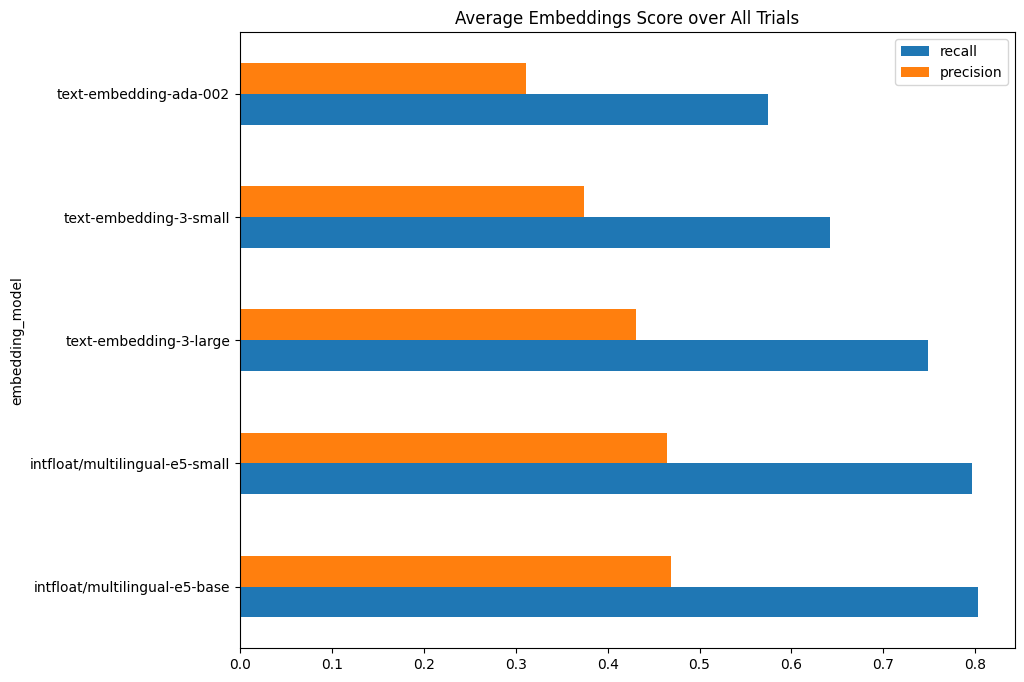

In [22]:
df.groupby("embedding_model")[["recall", "precision"]].mean().plot(kind='barh', title="Average Embeddings Score over All Trials", figsize=(10,8));

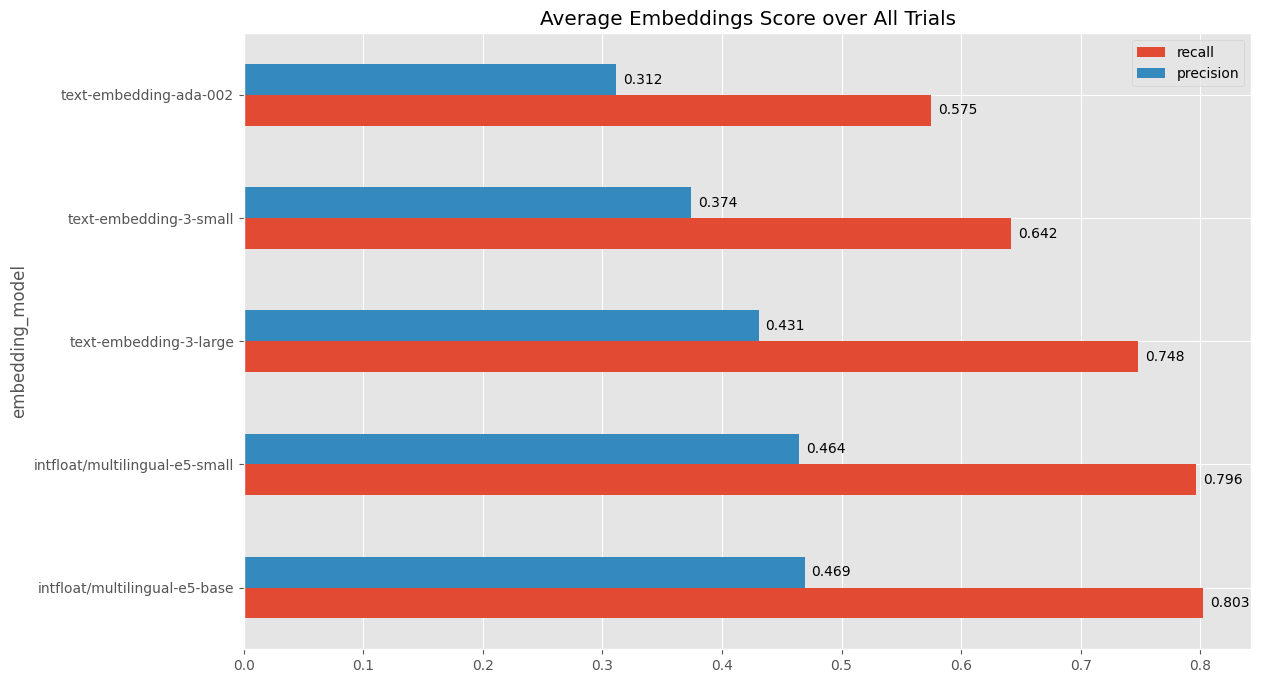

In [32]:
import matplotlib.pyplot as plt

# Grouping by 'embedding_model' and calculating the mean for 'recall' and 'precision'
grouped_data = df.groupby("embedding_model")[["recall", "precision"]].mean()

# Setting a plotting style for better aesthetics
plt.style.use('ggplot')

# Creating the bar plot
ax = grouped_data.plot(kind='barh', figsize=(13, 8), title="Average Embeddings Score over All Trials")

# Annotating the bars with their respective values
for p in ax.patches:
    ax.annotate(f"{p.get_width():.3f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()


In [37]:
df.collection_name.str[:5].unique()

array(['PQ_CO', 'PC_10', 'PS_Mi', 'PQ_SP', 'PQS_A', 'PS_Ll', 'PC_30',
       'PC_50', 'PS_AL'], dtype=object)

In [38]:
recursive_dict = {
    'PQ_CO': "Hypothetical Questions",
    'PC_10': "Smaller Chunks",
    'PS_Mi': "Summaries",
    "PQS_A": "Hypothetical Questions + Summaries",
    "PS_Ll": "Summaries",
    "PC_30": "Smaller Chunks",
    "PC_50": "Smaller Chunks",
    "PS_AL": "Summaries"
}

In [39]:
df['recursive_type'] = df.collection_name.str[:5].map(recursive_dict)

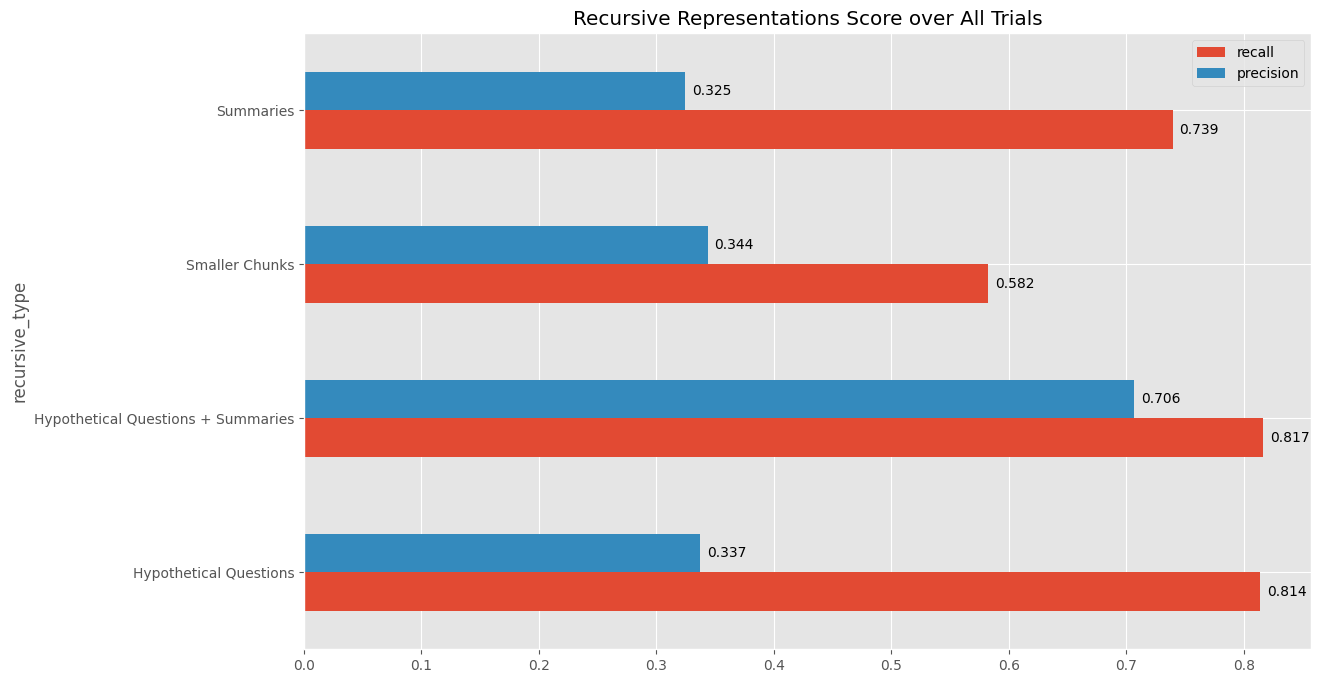

In [40]:
import matplotlib.pyplot as plt

# Grouping by 'embedding_model' and calculating the mean for 'recall' and 'precision'
grouped_data = df.groupby("recursive_type")[["recall", "precision"]].mean()

# Setting a plotting style for better aesthetics
plt.style.use('ggplot')

# Creating the bar plot
ax = grouped_data.plot(kind='barh', figsize=(13, 8), title="Recursive Representations Score over All Trials")

# Annotating the bars with their respective values
for p in ax.patches:
    ax.annotate(f"{p.get_width():.3f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()


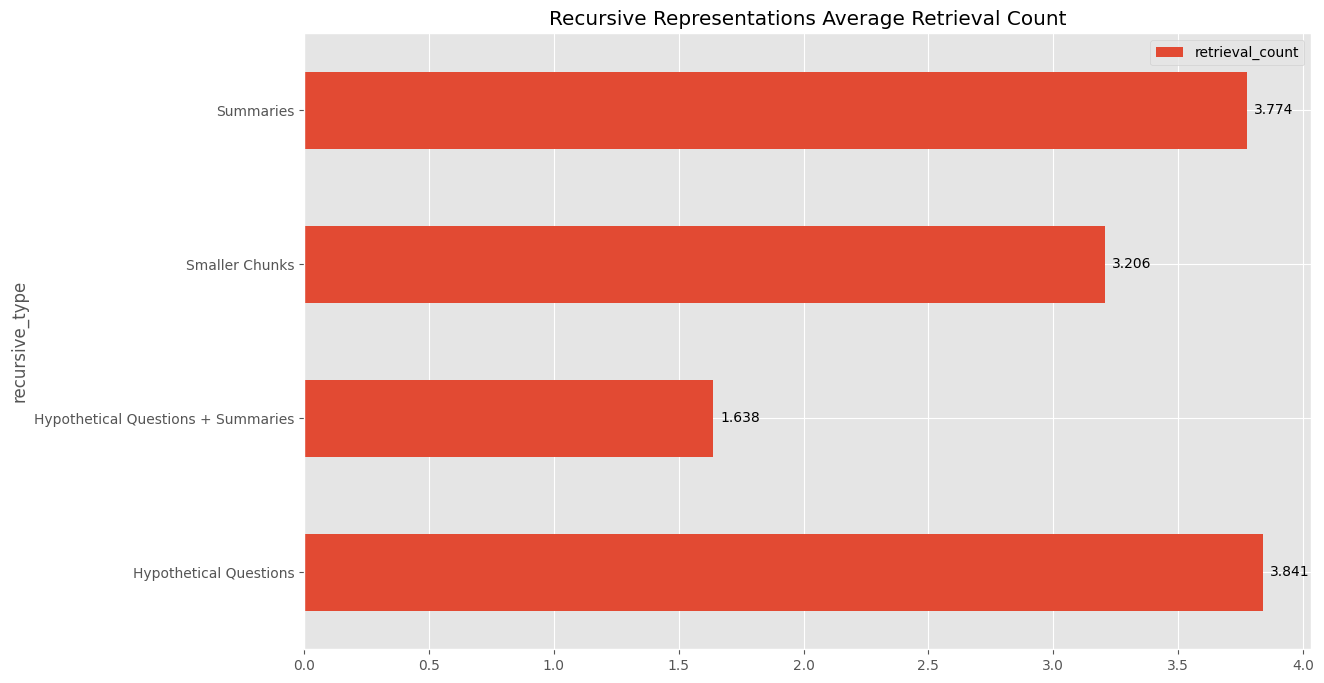

In [41]:
import matplotlib.pyplot as plt

# Grouping by 'embedding_model' and calculating the mean for 'recall' and 'precision'
grouped_data = df.groupby("recursive_type")[["retrieval_count"]].mean()

# Setting a plotting style for better aesthetics
plt.style.use('ggplot')

# Creating the bar plot
ax = grouped_data.plot(kind='barh', figsize=(13, 8), title="Recursive Representations Average Retrieval Count")

# Annotating the bars with their respective values
for p in ax.patches:
    ax.annotate(f"{p.get_width():.3f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()


In [46]:
df.collection_name.str[5:19].unique()

array(['MB_Llama_3_70b', 'MB_ALL_text_em', '0_text_embeddi',
       'xtral_8x22B_in', 'LIT_Mixtral_8x', 'LIT_Llama_3_70',
       'LL_intfloat_mu', 'ama_3_70b_chat', 'MB_Mixtral_8x2',
       '0_300_100_mult', '0_100_text_emb', 'LIT_Llama_3_8b',
       'L_intfloat_mul', 'LIT_ALL_text_e', 'LL_text_embedd',
       '0_100_multilin', 'LIT_ALL_intflo', '0_multilingual',
       '0_300_text_emb', 'MB_Llama_3_8b_', 'L_text_embeddi',
       'xtral_8x22B_te', 'ama_3_8b_chat_', 'MB_ALL_intfloa',
       '0_300_multilin', '0_300_100_text'], dtype=object)

In [47]:
def match_model(text):
    if 'Llama_3_70b' in text:
        return 'Llama-3-70B'
    elif 'Mixtral' in text:
        return 'Mixtral-8x22B'
    elif 'Llama_3_8b' in text:
        return 'Llama-3-8B'
    elif 'ALL' in text:
        return 'All Models'
    else:
        return None

In [50]:
df['generation_model'] = df.collection_name.apply(match_model)

In [51]:
df.head()

,question,answer,source,collection_name,embedding_model,k,recall,recall@1,recall@2,recall@3,precision,precision@1,precision@2,precision@3,average_precision,retrieval_count,recursive_type,generation_model
0,ما هو صافي ربح المجموعة لعام 2022؟,424.6 مليون ريال سعودي,Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,1,1,1,1,0.25,1,1,1,1.0,4,Hypothetical Questions,Llama-3-70B
1,ما هو صافي ربح المجموعة لعام 2021؟,587.7 مليون ريال سعودي,Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,1,0,1,1,0.25,0,0,0,0.5,4,Hypothetical Questions,Llama-3-70B
2,ما هي نسبة تغير صافي ربح المجموعة بين 2022 و 2...,انخفض بنسبة 27.8%,Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,0,0,0,0,0.00,0,0,0,0.0,4,Hypothetical Questions,Llama-3-70B
3,ماذا كانت الايرادات التشغيلية للمجموعة لعام 2022؟,"1,071.4 مليون ريال سعودي",Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,1,0,1,1,0.25,0,0,0,0.5,4,Hypothetical Questions,Llama-3-70B
4,ماذا كانت الايرادات التشغيلية للمجموعة لعام 2021؟,"1,166.1 مليون ريال سعودي",Press Release,PQ_COMB_Llama_3_70b_chat_hf_text_embedding_ada...,text-embedding-ada-002,3,0,0,0,0,0.00,0,0,0,0.0,4,Hypothetical Questions,Llama-3-70B


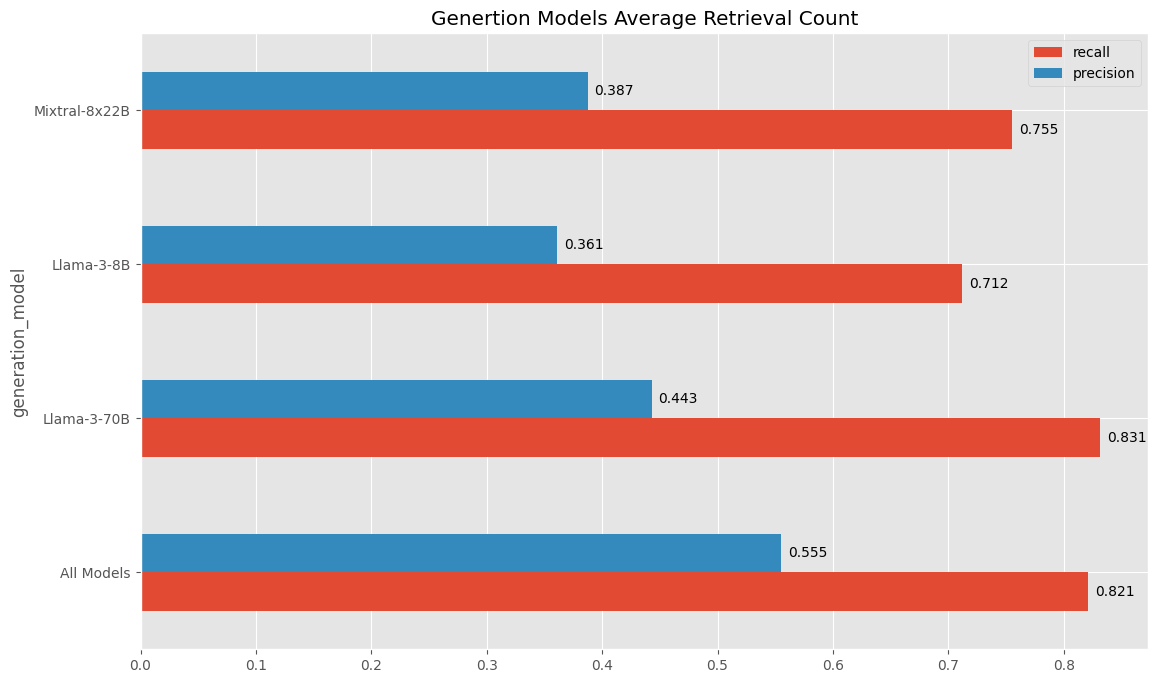

In [55]:
import matplotlib.pyplot as plt

# Grouping by 'embedding_model' and calculating the mean for 'recall' and 'precision'
grouped_data = df[~df.generation_model.isna()].groupby("generation_model")[["recall", "precision"]].mean()

# Setting a plotting style for better aesthetics
plt.style.use('ggplot')

# Creating the bar plot
ax = grouped_data.plot(kind='barh', figsize=(13, 8), title="Genertion Models Average Retrieval Count")

# Annotating the bars with their respective values
for p in ax.patches:
    ax.annotate(f"{p.get_width():.3f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()